<a href="https://colab.research.google.com/github/Chahd-TB/Neural-Networks-for-Handwritten-Digit-Recognition/blob/main/Neural_Networks_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Lab: Neural Networks for Handwritten Digit Recognition (Binary Classification)

In this exercise, you will use a neural network to recognize the hand-written digits zero and one.


# Outline
- [ 1 - Setup & Packages ](#1)
- [ 2 - Neural Networks](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2 Dataset](#2.2)
  - [ 2.3 Model representation](#2.3)
  - [ 2.4 Tensorflow Model Implementation](#2.4)
    - [ Exercise 1](#ex01)
    - [ Exercise 2](#ex02)
  - [ 2.5 Pytorch Model Implementation ](#2.5)
    - [ Exercise 3](#ex03)
    - [ Exercise 4](#ex04)
  - [ 2.6 NumPy Model Implementation (Forward Prop in NumPy)](#2.6)
    - [ Exercise 5](#ex05)



<a name="1"></a>
# 1 -  Setup and Packages

Before starting, make sure to mount your Google Drive and navigate to the correct directory where this notebook is located. This ensures you can access the dataset and utility libraries.

**Step 1: Mount Google Drive**

Run the following code to mount your Google Drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 2: Navigate to the Notebook's Directory**

Change to the directory where this notebook is located. This ensures you can access the dataset and utility files:

In [ ]:
cd "/content/drive/MyDrive/Lab4_ Neural_Networks/"

**Step 3: Import Required Packages**

Next, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

**Tensorflow vs Keras**  
Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow.

<a name="2"></a>
## 2 - Neural Networks

In Lab 1, You have implemented logistic regression, which can handle only linearly separable problems. For even more complex scenarios such as image recognition, **neural networks are preferred**.

<a name="2.1"></a>
### 2.1 Problem Statement

In this exercise, you will use a neural network to recognize two handwritten digits, **zero and one**. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. You will extend this network to recognize all 10 digits (0-9) in the **second part of this lab**.

This exercise will show you how the methods you have learned can be used for this classification task.

<a name="2.2"></a>
### 2.2 Dataset

You will start by loading the dataset for this task.
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 1000 training examples of handwritten digits $^1$, here limited to zero and one.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit.
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location.
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector.
        - Each training example becomes a single row in our data matrix `X`.
        - This gives us a 1000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X =
\left(\begin{array}{cc}
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\
--- (x^{(m)}) ---
\end{array}\right)$$

- The second part of the training set is a 1000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 1` if the image is of the digit `1`.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [ ]:
def load_data():
    X = np.load("data/X.npy")
    y = np.load("data/y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y

In [ ]:
# load dataset
X, y = load_data()

**View the variables**
Let's get more familiar with your dataset.  
- A good place to start is to print out each variable and see what it contains.

The code below prints elements of the variables `X` and `y`.  

In [ ]:
print ('The first element of X is: ', X[0])

In [ ]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

In [ ]:
print ('The first element of y is: ', y[0]) # we get an array 1x1
print ('The last element of y is: ', y[-1]) # we get an array 1x1

**Check the dimensions of your variables**

Another way to get familiar with your data is to view its dimensions. Please print the shape of `X` and `y` and see how many training examples you have in your dataset.

In [ ]:
print ('The shape of X is: ' , X.shape)
print ('The shape of y is: ' , y.shape)

**Visualizing the Data**

You will begin by visualizing a subset of the training set.
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together.
- The label for each image is displayed above the image

In [ ]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

<a name="2.3"></a>
### 2.3 Model representation

The neural network you will use in this assignment is shown in the figure below.
- This has three dense layers with sigmoid activations.
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times 20$, this gives us $400$ inputs

$.$

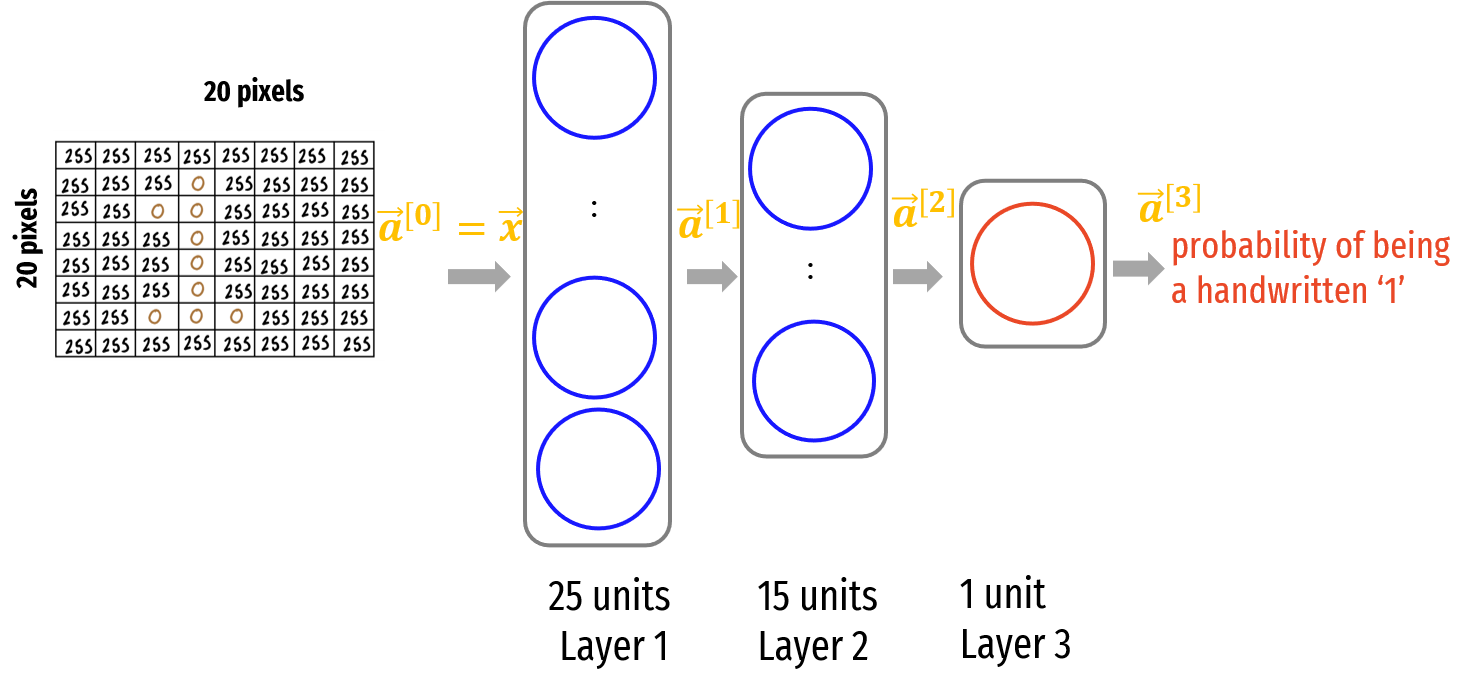

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3.

    - Recall that the dimensions of these parameters are determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (n,1) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention.

<a name="2.4"></a>

### 2.4 Tensorflow Model Implementation



<a name="ex01"></a>
### Exercise 1

Construct the network described above.

In [ ]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),    #specify input size
        ### START CODE HERE ###
        tf.keras.layers.Dense(25, activation='relu', name='layer1'),
        tf.keras.layers.Dense(15, activation='relu', name='layer2'),
        tf.keras.layers.Dense(1, activation='sigmoid', name='layer3')
        ### END CODE HERE ###
    ], name = "my_model"
)

In [ ]:
model.summary()

<details>
  <summary><font size="3" color="darkblue"><b>Expected Output (Click to Expand) </b></font></summary>
The `model.summary()` function displays a useful summary of the model. Because we have specified an input layer size, the shape of the weight and bias arrays are determined and the total number of parameters per layer can be shown. Note, the names of the layers may vary as they are auto-generated.  
    
    
```
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense (Dense)                (None, 25)                10025     
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
=================================================================
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________
```

The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [ ]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [ ]:
[layer1, layer2, layer3] = model.layers
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

**Expected Output**
```
W1 shape = (400, 25), b1 shape = (25,)  
W2 shape = (25, 15), b2 shape = (15,)  
W3 shape = (15, 1), b3 shape = (1,)
```

`xx.get_weights` returns a NumPy array. One can also access the weights directly in their tensor form. Note the shape of the tensors in the final layer.

In [ ]:
print(model.layers[2].weights)

Let's export the model into an H5/Keras file. Once exported, you can find model.keras in the same directory as this notebook. Download the file and use [Netron](https://netron.app/) to visualize its contents.


In [ ]:
model.save("my_model.keras")

<a name="ex02"></a>
### Exercise 2

Train your model using BCE loss and Adam optimizer with lr=0.001 for 20 epochs. Then, test the impact of:


*   The optimizer.
*   The learning rate.



In [ ]:
# YOUR CODE GOES HERE
# Compile the model with BCE loss, Adam optimizer, and learning rate 0.001
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(
    X, y,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)

To run the model on an example to make a prediction, use [Keras `predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model). The input to `predict` is an array so the single example is reshaped to be two dimensional.

In [ ]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero.
In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one.
As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

In [ ]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

In [ ]:
Yhat = (model.predict(X)>=0.5).astype(int)
# Number of correctly classified samples
print('Number of correctly classified sameple', np.sum(Yhat==y))

Let's compare the predictions vs the labels for a random sample of 64 digits.

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

<a name="2.5"></a>

### 2.5 Pytorch Model Implementation

<a name="ex03"></a>
### Exercise 3

Construct the network described in section 2.4 using the pytorch library.

In [ ]:
import torch
import torch.nn as nn

class DigitRecognitionNet(nn.Module):
    def __init__(self):
        super(DigitRecognitionNet, self).__init__()
        # YOUR CODE STARTS HERE
        # Define the layers of the network
        self.layer1 = nn.Linear(400, 25)  # Input layer (400 inputs) -> Hidden layer 1 (25 neurons)
        self.layer2 = nn.Linear(25, 15)   # Hidden layer 1 (25 neurons) -> Hidden layer 2 (15 neurons)
        self.layer3 = nn.Linear(15, 1)    # Hidden layer 2 (15 neurons) -> Output layer (1 neuron)

        # Activation functions
        self.relu = nn.ReLU()          # ReLU activation for hidden layers
        self.sigmoid = nn.Sigmoid()    # Sigmoid activation for the output layer
        # YOUR CODE ENDS HERE

    def forward(self, x):
        # YOUR CODE STARTS HERE
        # Forward pass through the network
        x = self.relu(self.layer1(x))     # First hidden layer with ReLU activation
        x = self.relu(self.layer2(x))     # Second hidden layer with ReLU activation
        x = self.sigmoid(self.layer3(x))  # Output layer with Sigmoid activation
        return x
        # YOUR CODE ENDS HERE

In [ ]:
from torchsummary import summary
model = DigitRecognitionNet ()
summary(model, input_size=(1, 400))

<details>
  <summary><font size="3" color="darkblue"><b>Expected Output (Click to Expand) </b></font></summary>
The `summary()` function from torchsummary displays a useful summary of the model. Because we have specified an input layer size, the shape of the weight and bias arrays are determined and the total number of parameters per layer can be shown.  
    
    
```
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
================================================================
            Linear-1                [-1, 1, 25]          10,025
              ReLU-2                [-1, 1, 25]               0
            Linear-3                [-1, 1, 15]             390
              ReLU-4                [-1, 1, 15]               0
            Linear-5                 [-1, 1, 1]              16
           Sigmoid-6                 [-1, 1, 1]               0
================================================================
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04
----------------------------------------------------------------
```

The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [ ]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [ ]:
# Access weights and biases for each layer
W1, b1 = model.layer1.weight, model.layer1.bias
W2, b2 = model.layer2.weight, model.layer2.bias
W3, b3 = model.layer3.weight, model.layer3.bias

# Print shapes of weights and biases
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

**Expected Output**
```
W1 shape = torch.Size([25, 400]), b1 shape = torch.Size([25])
W2 shape = torch.Size([15, 25]), b2 shape = torch.Size([15])
W3 shape = torch.Size([1, 15]), b3 shape = torch.Size([1])
```

In PyTorch, the shape of the weight matrix for a linear layer (nn.Linear) is reversed compared to frameworks like Keras/TensorFlow. Specifically:

In Keras/TensorFlow, the weight matrix for a layer with input_dim = m and output_dim = n has a shape of [m, n].

In PyTorch, the weight matrix for a layer with in_features = m and out_features = n has a shape of [n, m].

For example:

A layer with 400 input features and 25 output features:

- In Keras/TensorFlow: W.shape = (400, 25)
- In PyTorch: W.shape = (25, 400)

`model.layerx.weight.data` returns a tensor.

In [ ]:
print(model.layer3.weight.data)

<a name="ex04"></a>
### Exercise 4

Train your model using BCE loss and Adam optimizer with lr=0.001 for 20 epochs. Then, test the impact of:


*   The optimizer.
*   The learning rate.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

epochs = 20
train_losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Analyzing the impact of optimizer and learning rate
optimizers = [
    optim.Adam(model.parameters(), lr=0.001),
    optim.SGD(model.parameters(), lr=0.001),
    optim.RMSprop(model.parameters(), lr=0.001)
]

optimizer_losses = []

for optimizer in optimizers:
    model.train()

    current_optimizer_losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_tensor)
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()
        current_optimizer_losses.append(loss.item())

    optimizer_losses.append(current_optimizer_losses)

# Plot the training losses for each optimizer
plt.plot(range(epochs), optimizer_losses[0], label='Adam')
plt.plot(range(epochs), optimizer_losses[1], label='SGD')
plt.plot(range(epochs), optimizer_losses[2], label='RMSprop')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Impact of Optimizer on Training Loss')
plt.show()

# Analyzing the impact of learning rate
learning_rates = [0.01, 0.001, 0.0001]
lr_losses = []

for lr in learning_rates:

    model.train()
    optimizer = optim.Adam(model.parameters(), lr=lr)  # Create optimizer with current lr

    current_lr_losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_tensor)
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()
        current_lr_losses.append(loss.item())

    lr_losses.append(current_lr_losses)

# Plot the training losses for each learning rate
plt.plot(range(epochs), lr_losses[0], label='lr=0.01')
plt.plot(range(epochs), lr_losses[1], label='lr=0.001')
plt.plot(range(epochs), lr_losses[2], label='lr=0.0001')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Impact of Learning Rate on Training Loss')
plt.show()
# YOUR CODE ENDS HERE

**Were the losses obtained in your implementation comparable to those of the TensorFlow model?** If not, what are the potential factors contributing to this discrepancy, and what steps can be taken to align the results with those achieved in the TensorFlow implementation?


In [ ]:
prediction = model(X_tensor[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model(X_tensor[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero.
In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one.
As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

In [ ]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

In [ ]:
Yhat = (model(X_tensor)>=0.5).numpy().astype(int)
# Number of correctly classified samples
print('Number of correctly classified sameple', np.sum(Yhat==y))

Let's compare the predictions vs the labels for a random sample of 64 digits.

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model(X_tensor[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

<a name="2.6"></a>
### 2.6 NumPy Model Implementation (Forward Prop in NumPy)
The goal here is to build your own dense layer using NumPy. This can then be utilized to build a multi-layer neural network.



<a name="ex05"></a>
### Exercise 5

Build a dense layer subroutine that uses vectorized implementation of the forward prop step.

In [ ]:
import numpy as np

def my_dense(A_in, W, b, g):
    """
    Computes dense layer
    Args:
      A_in (ndarray (m,n)) : Data, m examples, n features each
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (1,j)) : bias vector, j units
      g    activation function (e.g., sigmoid, relu)
    Returns:
      A_out (ndarray (m,j)) : m examples, j units
    """
    ### START CODE HERE ###
    # Step 1: Matrix multiplication of A_in and W
    Z = np.dot(A_in, W) + b  # Shape: (m, j)

    # Step 2: Apply the activation function g
    A_out = g(Z)  # Apply activation function element-wise

    ### END CODE HERE ###
    return A_out

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """

    g = 1/(1+np.exp(-z))
    return g

In [ ]:
def relu(z):
    """
    Compute the Rectified Linear Unit (ReLU) of z.

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): relu(z), with the same shape as z.
                     ReLU is defined as g = max(0, z).
    """

    g = np.maximum(0, z)
    return g

In [ ]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1, 3 features)
A_tst = my_dense(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

**Expected Output**

```
[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]]
 ```

<a name="ex05"></a>
### Exercise 5

Complete the following function to build a 3-layer dense neural network. The function should take as input the initial input x, weight matrices W1, W2, W3, bias vectors b1, b2, b3, and apply the my_dense function with a sigmoid activation at each layer. Return the final output of the network.

In [ ]:
def my_sequential(X, W1, b1, W2, b2, W3, b3):
    """
    Builds a 3-layer dense neural network using the my_dense function.

    Args:
      X (ndarray (m,n)) : Input data, m examples, n features each
      W1 (ndarray (n,j1)): Weight matrix for the first layer, n features per unit, j1 units
      b1 (ndarray (1,j1)): Bias vector for the first layer, j1 units
      W2 (ndarray (j1,j2)): Weight matrix for the second layer, j1 inputs, j2 units
      b2 (ndarray (1,j2)): Bias vector for the second layer, j2 units
      W3 (ndarray (j2,j3)): Weight matrix for the third layer, j2 inputs, j3 units
      b3 (ndarray (1,j3)): Bias vector for the third layer, j3 units

    Returns:
      A3 (ndarray (m,j3)) : Output of the third layer, m examples, j3 units
    """
    # Define the sigmoid activation function
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    # YOUR CODE STARTS HERE

    # First layer
    A1 = my_dense(X, W1, b1, sigmoid)

    # Second layer
    A2 = my_dense(A1, W2, b2, sigmoid)

    # Third layer
    A3 = my_dense(A2, W3, b3, sigmoid)

    # YOUR CODE ENDS HERE

    return A3

We can copy trained weights and biases from Tensorflow.

In [ ]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

Let's make a prediction with the new model. This will make a prediction on *all of the examples at once*. Note the shape of the output.

In [ ]:
Prediction = my_sequential(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Prediction.shape

We'll apply a threshold of 0.5 as before, but to all predictions at once.

In [ ]:
Yhat = (Prediction >= 0.5).astype(int)
print("predict a zero: ",Yhat[0], "predict a one: ", Yhat[500])

In [ ]:
# Number of correctly classified samples
print('Number of correctly classified sameple', np.sum(Yhat==y))

Run the following cell to see predictions. This will use the predictions we just calculated above.

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off()
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()